In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical


In [41]:
n_pts = 500 
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)


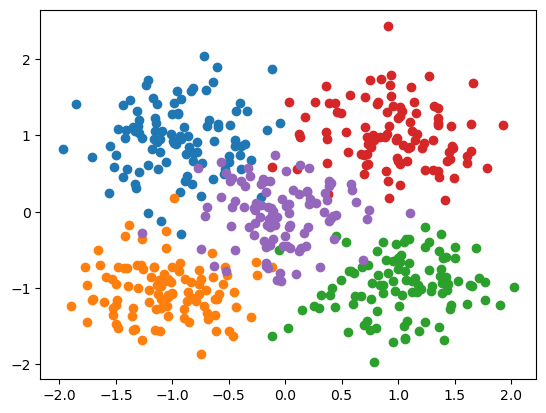

In [42]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(X[y == 3, 0], X[y == 3, 1])
plt.scatter(X[y == 4, 0], X[y == 4, 1])



In [43]:
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [44]:
model = Sequential()
model.add(Dense(units = 5, input_shape = (2, ), activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

c:\Users\dknjy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4806 - loss: 1.5317  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7695 - loss: 0.7051 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8963 - loss: 0.4697 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.3370 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9524 - loss: 0.2963 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9572 - loss: 0.2604 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9313 - loss: 0.2690 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9555 - loss: 0.2195 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9465 - loss: 0.2243 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.9508 - loss: 0.2274
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9626 - loss: 0.1954 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [46]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    pred_classes = np.argmax(pred_func, axis=1)
    z = pred_classes.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


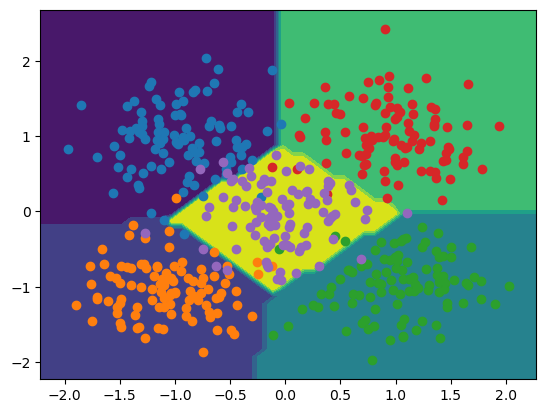

In [47]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(X[y == 3, 0], X[y == 3, 1])
plt.scatter(X[y == 4, 0], X[y == 4, 1])



79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction is [2]


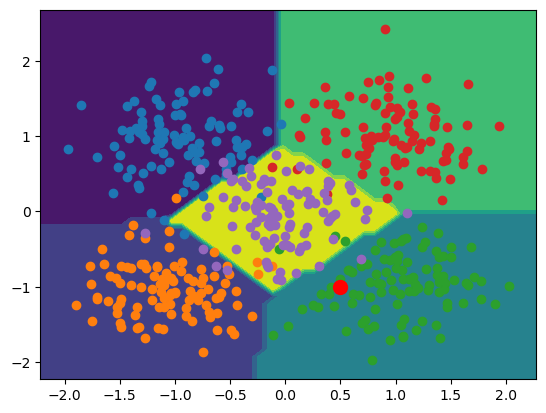

In [48]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(X[y == 3, 0], X[y == 3, 1])
plt.scatter(X[y == 4, 0], X[y == 4, 1])

x = 0.5
y = -1
point = np.array([[x, y]]) 
prediction = np.argmax(model.predict(point), axis=-1)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction is", prediction)